Summary Statistics:
  Statistic         Value
0     count    819.000000
1      mean    955.251576
2       std   2526.768137
3       min   -220.000000
4       25%      0.219647
5       50%     10.000000
6       75%     59.515000
7       max  11312.000000


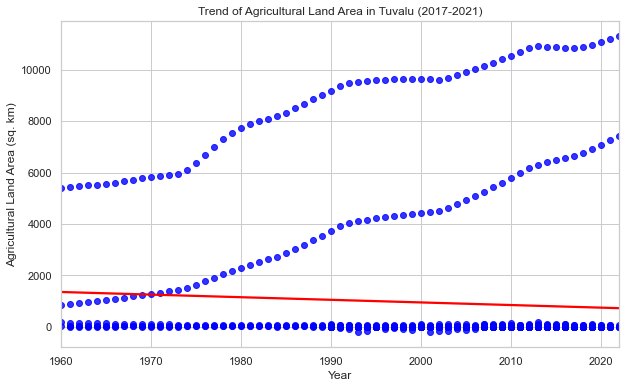

Detected Anomalies:
     country_name country_ISO3  year  \
0          Tuvalu          TUV  2021   
1          Tuvalu          TUV  2020   
2          Tuvalu          TUV  2019   
3          Tuvalu          TUV  2018   
4          Tuvalu          TUV  2017   
...           ...          ...   ...   
1285       Tuvalu          TUV  1964   
1286       Tuvalu          TUV  1963   
1287       Tuvalu          TUV  1962   
1288       Tuvalu          TUV  1961   
1289       Tuvalu          TUV  1960   

                                indicator_name     indicator_code   value  \
0                   Agricultural land (sq. km)     AG.LND.AGRI.K2  18.000   
1                   Agricultural land (sq. km)     AG.LND.AGRI.K2  18.000   
2                   Agricultural land (sq. km)     AG.LND.AGRI.K2  18.000   
3                   Agricultural land (sq. km)     AG.LND.AGRI.K2  18.000   
4                   Agricultural land (sq. km)     AG.LND.AGRI.K2  18.000   
...                                  

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('tuv.csv', delimiter=';')

# Convert 'value' to numeric, coercing errors to NaN (missing values)
data['value'] = pd.to_numeric(data['value'], errors='coerce')


data.dropna(subset=['value'], inplace=True)

# Compute summary statistics for the 'value' column, now that it's numeric
summary_stats = data['value'].describe()

# Convert summary statistics to DataFrame for better handling and exporting
summary_stats_df = summary_stats.reset_index()
summary_stats_df.columns = ['Statistic', 'Value']

# Save the summary statistics to an Excel file
summary_stats_df.to_excel('summary_statistics.xlsx', index=False)

print("Summary Statistics:")
print(summary_stats_df)

# Trend analysis with a plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
trend_plot = sns.regplot(x='year', y='value', data=data, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Trend of Agricultural Land Area in Tuvalu (2017-2021)')
plt.xlabel('Year')
plt.ylabel('Agricultural Land Area (sq. km)')
plt.show()

# Fit linear regression to find the trend
X = data['year'].values.reshape(-1, 1)  # Reshape for sklearn
y = data['value'].values  # Values are already numeric

model = LinearRegression()
model.fit(X, y)

# Predict and calculate residuals to identify anomalies
data['predicted'] = model.predict(X)
data['residuals'] = data['value'] - data['predicted']

# Display anomalies
anomalies = data[np.abs(data['residuals']) > 1.5]  # Threshold set arbitrarily to 1.5
print("Detected Anomalies:")
print(anomalies)



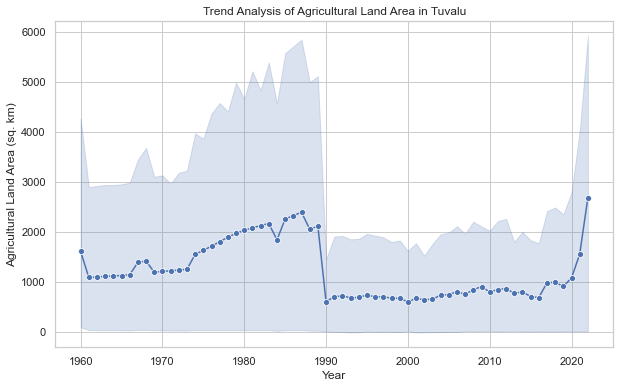

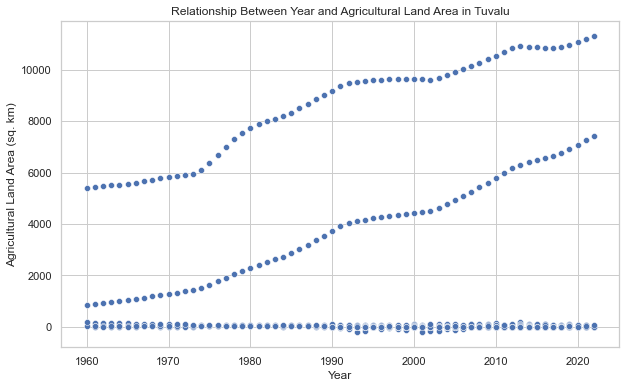

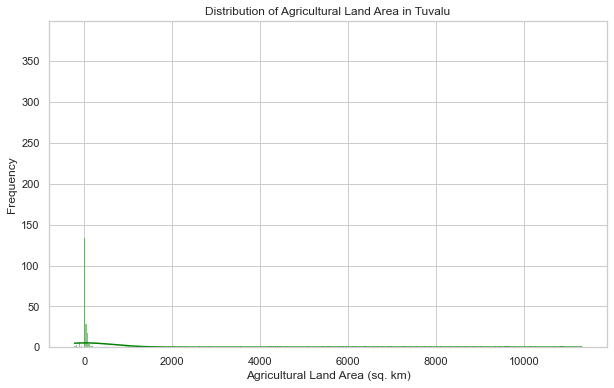

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('tuv.csv', delimiter=';')

# Convert 'value' to numeric, coercing errors to NaN (missing values)
data['value'] = pd.to_numeric(data['value'], errors='coerce')

# Drop rows where 'value' is NaN after conversion (if any)
data.dropna(subset=['value'], inplace=True)

# Sort data by year for better plotting
data.sort_values('year', inplace=True)

# Plot One: Trend Analysis
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='value', data=data, marker='o')
plt.title('Trend Analysis of Agricultural Land Area in Tuvalu')
plt.xlabel('Year')
plt.ylabel('Agricultural Land Area (sq. km)')
plt.grid(True)
plt.show()

# Plot Two: Relationship Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='value', data=data)
plt.title('Relationship Between Year and Agricultural Land Area in Tuvalu')
plt.xlabel('Year')
plt.ylabel('Agricultural Land Area (sq. km)')
plt.show()

# Plot Three: Distribution Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data['value'], kde=True, color='green')
plt.title('Distribution of Agricultural Land Area in Tuvalu')
plt.xlabel('Agricultural Land Area (sq. km)')
plt.ylabel('Frequency')
plt.show()
